**Importing necessary Libraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans

**Reading CSV File data :**

In [2]:
df=pd.read_csv("Online_Retail.csv", encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Cleaning Data :**

In [4]:
#Checking missing values
missing=df.isnull().sum()
print("Missing values :\n",missing)

Missing values :
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
#Dropping missing values
df_cleaned=df.dropna()

In [6]:
df_cleaned.size

3254632

<Axes: >

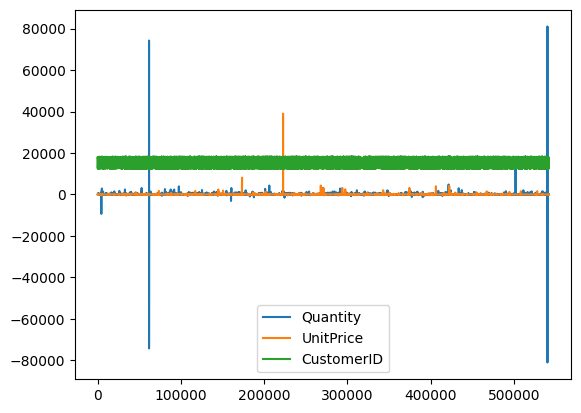

In [7]:
df_cleaned.plot()

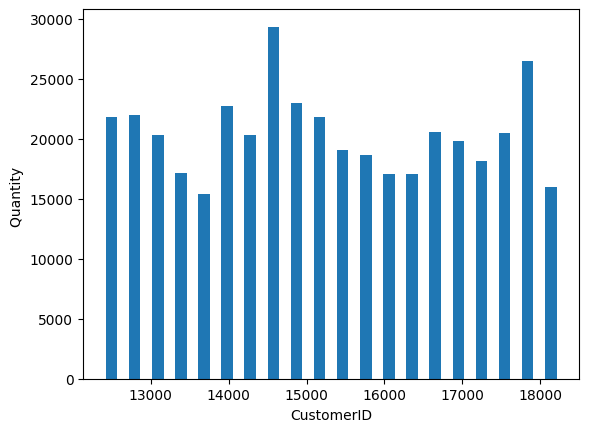

In [8]:
#Ploting a histogram
plt.hist(df_cleaned.CustomerID,bins=20,rwidth=0.5)
plt.ylabel('Quantity ')
plt.xlabel('CustomerID')
plt.show()

In [9]:
# Calculating outliers
Q1 = df_cleaned['CustomerID'].quantile(0.25)
Q3 = df_cleaned['CustomerID'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['CustomerID'] < (Q1 - 1.5 * IQR)) | (df_cleaned['CustomerID'] > (Q3 + 1.5 * IQR))]

In [10]:
# Checking if outliers are within the index range of df
valid_outliers = [idx for idx in outliers if idx in df_cleaned.index]

# Droping outliers from df
df_cleaned = df.drop(valid_outliers)

# Printing to verify
print("Original DataFrame:")
print(df.head())
print("\nDataFrame after dropping outliers:")
print(df_cleaned.head())


Original DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

DataFrame after dropping outliers:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365  

In [11]:
df_cleaned=df_cleaned.dropna()
df_cleaned.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [12]:
# Creating a 'TotalAmount' column for each transaction
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Selecting relevant features for clustering
X = df_cleaned[['Quantity', 'UnitPrice', 'TotalAmount']]

# Displaying the first few rows of X to verify
print(X.head())

   Quantity  UnitPrice  TotalAmount
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


 **K-Mean Clustering :**

In [13]:
 # Choosing the number of clusters
k = 3

# Initializing KMeans object with explicit n_init
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly

# Fit KMeans clustering model to the data
kmeans.fit(X)

# Getting cluster labels
cluster_labels = kmeans.labels_

# Adding cluster labels to the cleaned DataFrame
df_cleaned['Cluster'] = cluster_labels



**Vistualizing Clusters :**

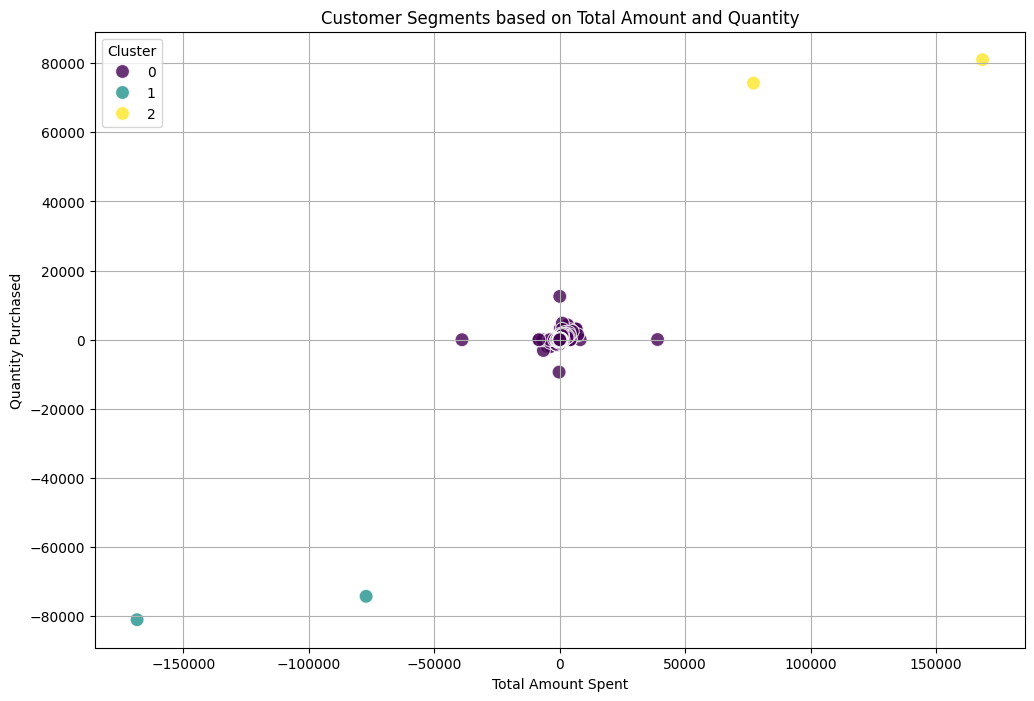

In [14]:
# Visualizing clusters based on TotalAmount vs Quantity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='TotalAmount', y='Quantity', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments based on Total Amount and Quantity')
plt.xlabel('Total Amount Spent')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
